In [1]:
from matplotlib.image import imread

image = imread("datasets/ladybug.png")
image.shape

(717, 1441, 3)

In [3]:
from sklearn.cluster import KMeans

X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8).fit(X)

segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

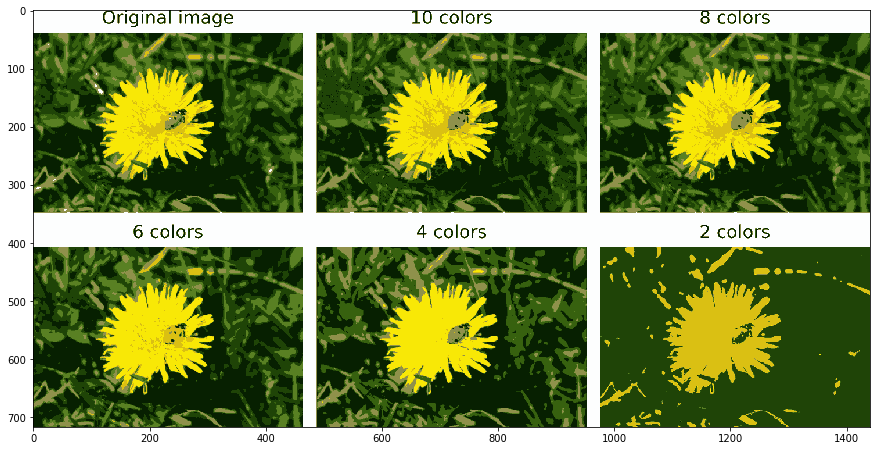

In [13]:
%matplotlib inline 
from matplotlib import pyplot as plt

plt.figure(figsize=(15,15))
plt.imshow(segmented_img, interpolation='nearest')
plt.show()

In [8]:
segmented_img.shape

(717, 1441, 3)

In [14]:
from sklearn import datasets 
from sklearn.cluster import DBSCAN

X, y = datasets.make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

dbscan.labels_

array([ 0,  1,  1, -1,  2,  7,  3,  3,  0,  4,  4,  5,  2,  6,  1,  1,  0,
        2,  0,  1,  1,  3,  5,  0,  0,  4,  2,  0,  0,  1,  0,  2,  0,  0,
        1, -1,  4,  0,  0,  0,  2,  0,  2,  2,  1,  2,  3,  0,  0,  1,  4,
        1,  0,  5,  0,  0,  0,  0,  0, -1,  0,  0,  7,  0,  1,  1,  4, -1,
        4,  0,  4,  2,  1,  1,  1,  7,  0,  4,  2,  2,  0,  1,  3,  2,  2,
        0,  0, -1,  0,  0,  1,  4, -1,  0,  1, -1,  1,  7,  1, -1,  1,  1,
        0,  2,  6, -1,  1,  0,  0,  8,  4,  7,  0,  3,  0,  0, -1,  2,  2,
        0,  2,  2,  5,  3,  0,  1,  7,  2,  1,  0,  0,  0,  0,  0,  1,  1,
        2,  0,  0,  5,  2,  2, -1, -1,  0, -1,  1,  0,  1,  0,  1,  0,  2,
       -1,  1,  0,  5,  2,  7,  0,  0,  1,  1,  7,  1,  0,  1,  8, -1,  2,
        2,  2,  0,  1,  2, -1,  0,  7,  0,  0,  0,  1,  0,  5,  0,  0,  1,
        2,  2,  4,  0,  1,  1,  2,  1,  3,  0,  2,  0,  7,  0,  3,  2,  1,
        0,  3, -1, -1, -1,  1,  0,  7,  5,  1,  0,  2, -1,  4,  1,  1,  4,
        2,  8,  1,  0,  1

In [5]:
from sklearn import datasets
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
    
olivetti_data = datasets.fetch_olivetti_faces()

In [6]:
olivetti_data.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

In [11]:
olivetti_data['target'].shape

(400,)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti_data.data, olivetti_data.target))
X_train_valid = olivetti_data.data[train_valid_idx]
y_train_valid = olivetti_data.target[train_valid_idx]
X_test = olivetti_data.data[test_idx]
y_test = olivetti_data.target[test_idx]

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
train_idx, valid_idx = next(strat_split.split(X_train_valid, y_train_valid))
X_train = olivetti_data.data[train_idx]
y_train = olivetti_data.target[train_idx]
X_valid = olivetti_data.data[valid_idx]
y_valid = olivetti_data.target[valid_idx]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(280, 4096) (280,)
(80, 4096) (80,)
(40, 4096) (40,)


In [18]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
x_train_pca = pca.fit_transform(X_train)
x_valid_pca = pca.fit_transform(X_valid)
x_test_pca = pca.fit_transform(X_test)

pca.n_components_

36

In [27]:
from sklearn.cluster import KMeans
k_range = range(5,100,5)
k_means_per_k = []
for k in k_range:
    print("K={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(x_train_pca)
    k_means_per_k.append(kmeans)

K=5
K=10
K=15
K=20
K=25
K=30
K=35
K=40
K=45
K=50
K=55
K=60
K=65
K=70
K=75
K=80
K=85
K=90
K=95


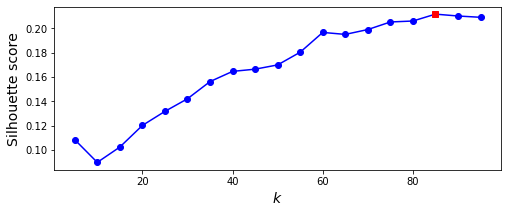

In [28]:
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

silhouette_scores = [silhouette_score(x_train_pca, model.labels_)
                     for model in k_means_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.show()

In [29]:
best_k

85

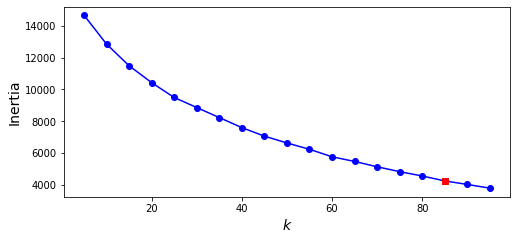

In [31]:
inertias = [model.inertia_ for model in k_means_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.plot(best_k, best_inertia, "rs")
plt.show()


In [32]:
best_index

16

In [41]:
k_means_best_model = k_means_per_k[best_index]

Cluster 0


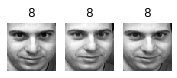

Cluster 1


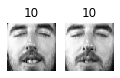

Cluster 2


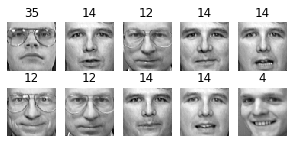

Cluster 3


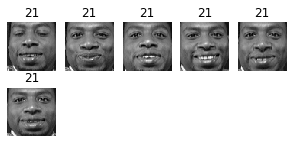

Cluster 4


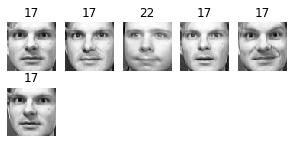

Cluster 5


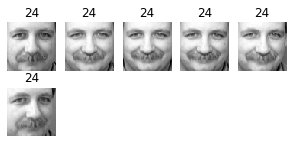

Cluster 6


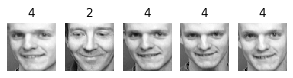

Cluster 7


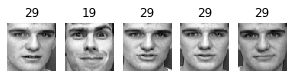

Cluster 8


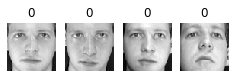

Cluster 9


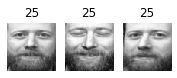

Cluster 10


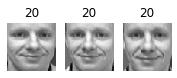

Cluster 11


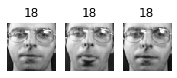

Cluster 12


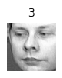

Cluster 13


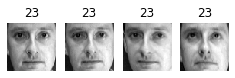

Cluster 14


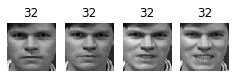

Cluster 15


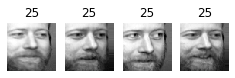

Cluster 16


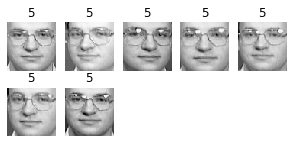

Cluster 17


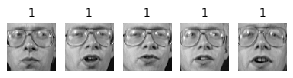

Cluster 18


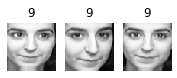

Cluster 19


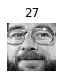

Cluster 20


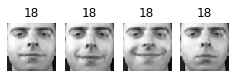

Cluster 21


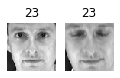

Cluster 22


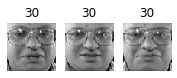

Cluster 23


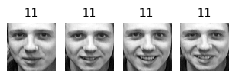

Cluster 24


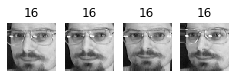

Cluster 25


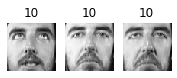

Cluster 26


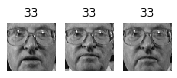

Cluster 27


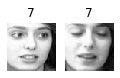

Cluster 28


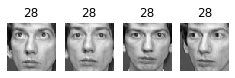

Cluster 29


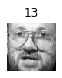

Cluster 30


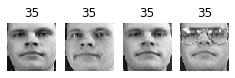

Cluster 31


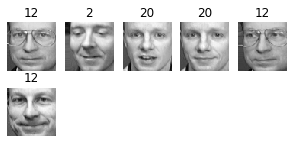

Cluster 32


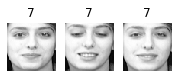

Cluster 33


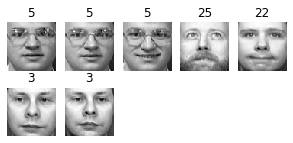

Cluster 34


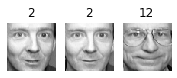

Cluster 35


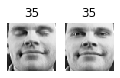

Cluster 36


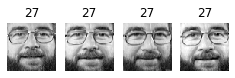

Cluster 37


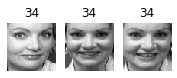

Cluster 38


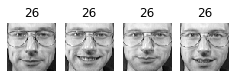

Cluster 39


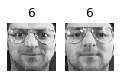

Cluster 40


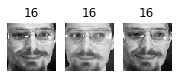

Cluster 41


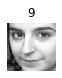

Cluster 42


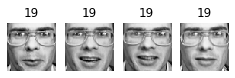

Cluster 43


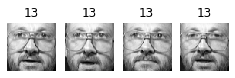

Cluster 44


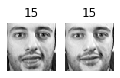

Cluster 45


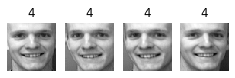

Cluster 46


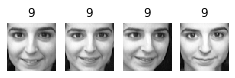

Cluster 47


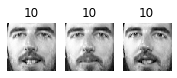

Cluster 48


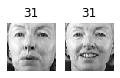

Cluster 49


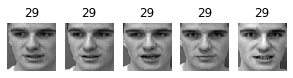

Cluster 50


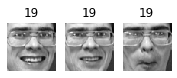

Cluster 51


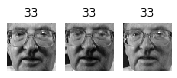

Cluster 52


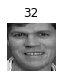

Cluster 53


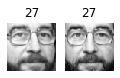

Cluster 54


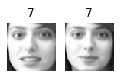

Cluster 55


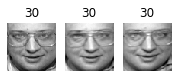

Cluster 56


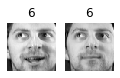

Cluster 57


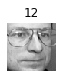

Cluster 58


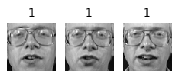

Cluster 59


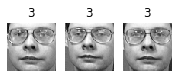

Cluster 60


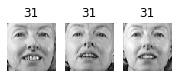

Cluster 61


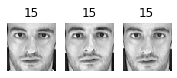

Cluster 62


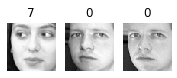

Cluster 63


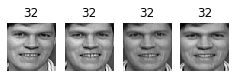

Cluster 64


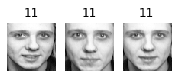

Cluster 65


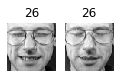

Cluster 66


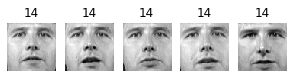

Cluster 67


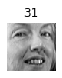

Cluster 68


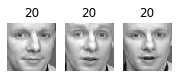

Cluster 69


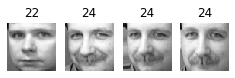

Cluster 70


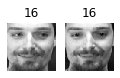

Cluster 71


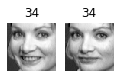

Cluster 72


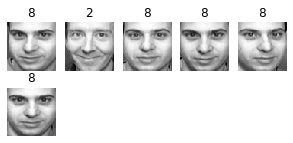

Cluster 73


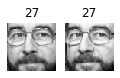

Cluster 74


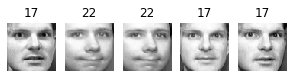

Cluster 75


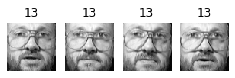

Cluster 76


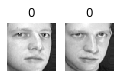

Cluster 77


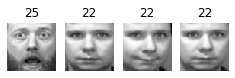

Cluster 78


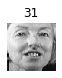

Cluster 79


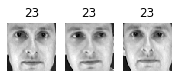

Cluster 80


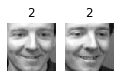

Cluster 81


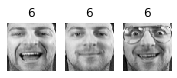

Cluster 82


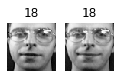

Cluster 83


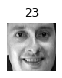

Cluster 84


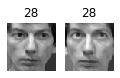

In [42]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(k_means_best_model.labels_):
    print("Cluster", cluster_id)
    in_cluster = k_means_best_model.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels)